In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# Stock price of Apple from 2010/1/4 to 2021-02-26
AAPL = pd.read_csv('AAPL.csv')
AAPL['Date'] = AAPL['Date'].astype('datetime64[ns]')
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.583586,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.594968,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.490066,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.478067,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.521136,447610800
...,...,...,...,...,...,...,...
2802,2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103607600
2803,2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,157859100
2804,2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,110691500
2805,2021-02-25,124.680000,126.459999,120.540001,120.989998,120.989998,147306500


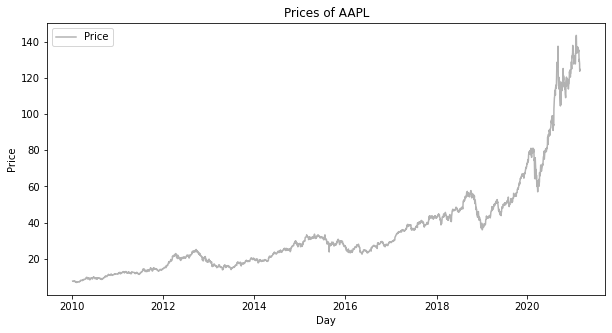

In [3]:
# Visualize prices from 2010 t0 2021
start = 0
end = -1

plt.figure(figsize=(10,5))
plt.plot(AAPL['Date'][start:end], AAPL[['Open']][start:end], label='Price', c='grey', alpha=0.6)

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Prices of AAPL')
plt.legend()
plt.show()

In [4]:
class Env():
    
    # Constructor
    def __init__(self, data, state_length, investment):
        '''
        INPUTS:
        - data [DataFrame]: the dataframe of the stock (from Yahool Finance).
        - state_length [int]: the size of state (trading timeframe) provided to the agent.
        '''
        # State attributes
        self.data = data
        self.state_length = state_length
        self.state = self.data[0:self.state_length]
        self.done = False # Whether there is more state
        self.t = self.state_length # Current date where the agent is at
        
        # Agent attributes
        self.wallet_init = investment # For resetting
        self.wallet = investment # For making updates
        self.portfolio = 0 # Stock owned by agent
        self.action_space = [0, 1] # Assume initial investment can buy at least 1 stock
        
    def step(self, action):
        '''
        INPUTS:
        - action [int]: the action took by the agent. 
            - action = 1: buy
            - action = -1: sell
            - action = 0: hold
        OUTPUTS:
        - state: the new state of the agent (one day foward)
        - reward: the reward of the action
        - action_space: avaliable actions of new state
        '''
        
        # Check if the agent can buy any stock
        # Returns: Boolean. True if can buy, False if not
        def can_buy(self):
            if self.wallet >= self.data.iloc[self.t].Open:
                    return True
            else:
                return False
    
        # Check if the agent can sell any stock
        # Returns: Boolean. True if can sell, False if not
        def can_sell(self):
            if self.portfolio > 0:
                return True
            else:
                return False
        
        # Increment state by 1 step (foward 1 day)
        def step_state(self):
            self.t += 1
            if self.t == self.data.shape[0]-1: # No more data
                self.done = True
            self.state = self.data[self.t - self.state_length : self.t]
            
        # Find avaliable actions for the next state
        def find_action_space(self):
            action_space = [0]
            if can_buy(self):
                action_space.append(1)
            if can_sell(self):
                action_space.append(-1)
            self.action_space = action_space
            
        # Computes the total balance: wallet + holdings
        def total_balance(self, price):
            '''
            INPUTS:
            - price [int]: price of 1 stock
            '''
            #current_price = self.data.iloc[0].Open # Price of 1 stock
            return self.wallet + price*self.portfolio
        
        reward = 0 # initialize reward
        price_t1 = self.data.iloc[self.t].Open
        if action == 1: # buy stock
            # Proceed to next state
            step_state(self)
            self.wallet -= price_t1
            self.portfolio += 1
            # Projected balance of t+1
            price_t2 = self.data.iloc[self.t].Open
            # reward is the regret
            reward = 100*(price_t2 - price_t1) / price_t1
        elif action == -1: # sell stock
            # Proceed to next state
            step_state(self)
            self.wallet += price_t1
            self.portfolio -= 1
            # Projected balance of t+1
            price_t2 = self.data.iloc[self.t].Open
            # reward is the opportunity cost
            reward = 100*(price_t1 - price_t2) / price_t1
        else: # hold stock
            step_state(self)
            reward = 0
        find_action_space(self)
        return self.state, reward, self.action_space
    
    # Reset the environment.
    def reset(self):
        # Reset state attributes
        self.t = self.state_length
        self.state = self.data[0:self.state_length]
        self.done = False
        
        # reset agent attributes
        self.wallet = self.wallet_init
        self.portfolio = 0
        self.action_space = [0, 1]

In [136]:
data = AAPL
state_length = 30
investment = 1000
env = Env(data, state_length, investment)

print('Reward:', env.step(1)[1])

AAPL[state_length:state_length+2]

Reward: -1.2537401439835414


,Date,Open,High,Low,Close,Adj Close,Volume
30,2010-02-17,7.292500,7.296786,7.173571,7.233929,6.231041,436396800
31,2010-02-18,7.201071,7.281786,7.175714,7.247500,6.242731,422825200
